---
format:
    html:
        embed-resources: true
---

In [7]:
import pandas as pd
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split

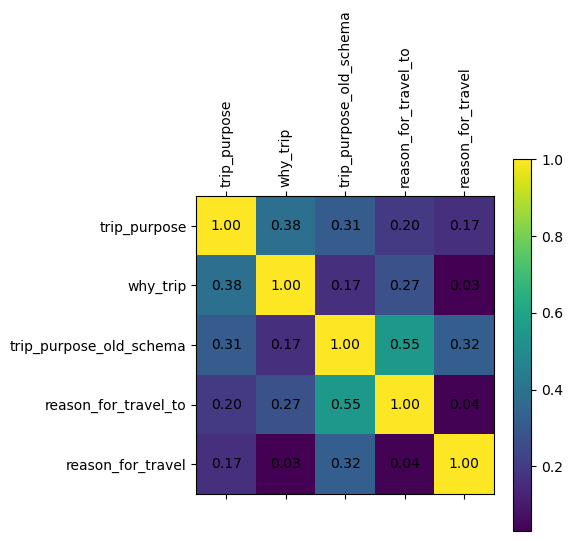

In [8]:
trip = pd.read_csv("../../../data/clean/trip.csv")

trip = trip[["trip_purpose", "why_trip", "trip_purpose_old_schema", "reason_for_travel_to", "reason_for_travel"]]

# Get correlation matrix
# convert to numeric with label encoder
le = LabelEncoder()
for col in trip.columns:
    if trip[col].dtype == "object":
        trip[col] = le.fit_transform(trip[col])

corr = trip.corr()
# Plot correlation matrix
plt.matshow(corr, fignum=1)
plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
plt.yticks(range(len(corr.columns)), corr.columns)
for (i, j), val in np.ndenumerate(corr):
    plt.text(j, i, '{:0.2f}'.format(val), ha='center', va='center', color='black')
plt.colorbar()
plt.show()

In [9]:
trip = pd.read_csv("../../../data/clean/trip.csv")

# Drop any columns with the string "id" or "flag" in them
for col in trip:
  if "id" in col:
    trip = trip.drop(col, axis=1)

# Drop these columns: 'reason_for_travel_to', 'why_trip', 'trip_purpose_old_schema'
trip = trip.drop(['trip_purpose_old_schema', 'why_trip', 'reason_for_travel_to'], axis=1)

# Prepare trip data for model
label_encoder = LabelEncoder()
scaler = MinMaxScaler()

for col in trip.columns.drop('trip_purpose'):
  if trip[col].dtype == object:
    trip[col] = label_encoder.fit_transform(trip[col])
  else: # Normalize
    trip[col] = scaler.fit_transform(trip[col].values.reshape(-1, 1))

# Remove rows where trip purpose is "Not Ascertained"
trip = trip[trip["trip_purpose"] != "Not ascertained"]
trip = trip.reset_index(drop=True)

vis = trip["trip_purpose"].astype('category')

trip["trip_purpose"] = label_encoder.fit_transform(trip["trip_purpose"])
target = trip["trip_purpose"].to_numpy()
features = trip.drop('trip_purpose', axis=1).to_numpy()

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

/Users/mariongeary/anaconda3/envs/dsan6600/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mariongeary/anaconda3/envs/dsan6600/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


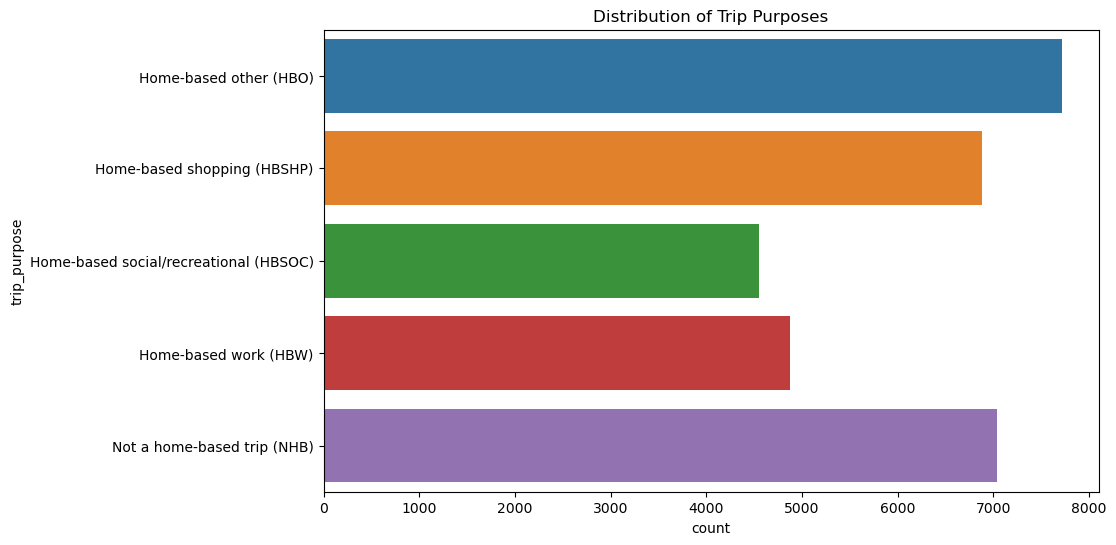

In [10]:
# Display distribution of original trip purposes as bar chart
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.countplot(y=vis)
plt.title("Distribution of Trip Purposes")
plt.show()

In [11]:
# # Train model with cross validation
# callback = keras.callbacks.EarlyStopping(patience=1)

# learning_rates = [0.1, 0.01, 0.001]
# hidden_units = [512, 256, 128, 64, 32]
# dropout = [0.0, 0.1, 0.2, 0.3]
# activation = ["relu", "sigmoid", "tanh"]

# # Set up cross validation
# from sklearn.model_selection import KFold
# kf = KFold(n_splits=5, shuffle=True)

# batch = 64

# # Train model with cross validation
# results = []
# for lr in learning_rates:
#   for hu in hidden_units:
#     for d in dropout:
#         for act in activation:
#             kf_results = []
#             for train_index, test_index in kf.split(features):
#                 print(f"Training model with {lr}, {hu}, {d}, {act}")
#                 x_train, x_test = features[train_index], features[test_index]
#                 y_train, y_test = target[train_index], target[test_index]
        
#                 model = keras.Sequential()
#                 model.add(layers.Input(shape=(features.shape[1],)))
#                 if act == "relu":
#                     model.add(layers.Dense(hu, activation='relu'))
#                 elif act == "sigmoid":
#                     model.add(layers.Dense(hu, activation='sigmoid'))
#                 if d > 0:
#                     model.add(layers.Dropout(d))
#                 model.add(layers.Dense(5, activation='softmax'))
#                 model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=lr), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#                 model.fit(x_train, y_train, epochs=1000, batch_size=batch, callbacks=[callback], validation_data=(x_test, y_test))
#                 train_loss, train_accuracy = model.evaluate(x_train, y_train)
#                 loss, accuracy = model.evaluate(x_test, y_test)
#                 kf_results.append((train_accuracy, accuracy, train_loss, loss))
#             results.append(
#                 {
#                     "learning_rate": lr,
#                     "hidden_units": hu,
#                     "dropout": d,
#                     "activation": act,
#                     "train_accuracy": np.mean([r[0] for r in kf_results]),
#                     "test_accuracy": np.mean([r[1] for r in kf_results]),
#                     "train_loss": np.mean([r[2] for r in kf_results]),
#                     "test_loss": np.mean([r[3] for r in kf_results])
#                 }
#             )
#             # Save results
#             pd.DataFrame(results).to_csv("results.csv", index=False)
#             print(f"Accuracy: {np.mean([r[0] for r in kf_results])} - Loss: {np.mean([r[2] for r in kf_results])}")
#             print(f"Val Accuracy: {np.mean([r[1] for r in kf_results])} - Val Loss: {np.mean([r[3] for r in kf_results])}")

In [104]:
results = pd.read_csv("results3.csv")

# Display results, sorted by test accuracy
results.sort_values(by="test_accuracy", ascending=False).head(10)

,learning_rate,hidden_units,dropout,activation,train_accuracy,test_accuracy,train_loss,test_loss
157,0.001,64,0.0,sigmoid,0.985370,0.972979,0.054781,0.084413
145,0.001,128,0.0,sigmoid,0.984718,0.969919,0.054775,0.095297
133,0.001,256,0.0,sigmoid,0.985145,0.969630,0.058285,0.100749
121,0.001,512,0.0,sigmoid,0.986546,0.968760,0.049717,0.100364
127,0.001,512,0.2,sigmoid,0.977576,0.964187,0.077677,0.116752
139,0.001,256,0.2,sigmoid,0.973349,0.964090,0.089051,0.121696
148,0.001,128,0.1,sigmoid,0.971490,0.963349,0.100531,0.125587
124,0.001,512,0.1,sigmoid,0.977351,0.963060,0.074840,0.117659
136,0.001,256,0.1,sigmoid,0.973776,0.962383,0.088757,0.124967
130,0.001,512,0.3,sigmoid,0.971602,0.961192,0.092711,0.126247


In [12]:
features.shape[1]

71

In [12]:
# Create validation data as 10% of training data
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)

# Create LSTM model
model = keras.Sequential()
model.add(layers.Input(shape=(features.shape[1],)))
# add convolutional layer
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(layers.Dense(5, activation='softmax'))

model.compile(optimizer=keras.optimizers.legacy.Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(
    x_train,
    y_train,
    epochs=500,
    batch_size=32,
    callbacks=keras.callbacks.EarlyStopping(patience=2),
    validation_data=(x_val, y_val)
)

2024-04-26 13:00:13.604992: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2 Pro
2024-04-26 13:00:13.605015: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2024-04-26 13:00:13.605021: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2024-04-26 13:00:13.605085: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-26 13:00:13.605126: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Train Accuracy: 0.6049
Validation Accuracy: 0.5801
Test Accuracy: 0.5781


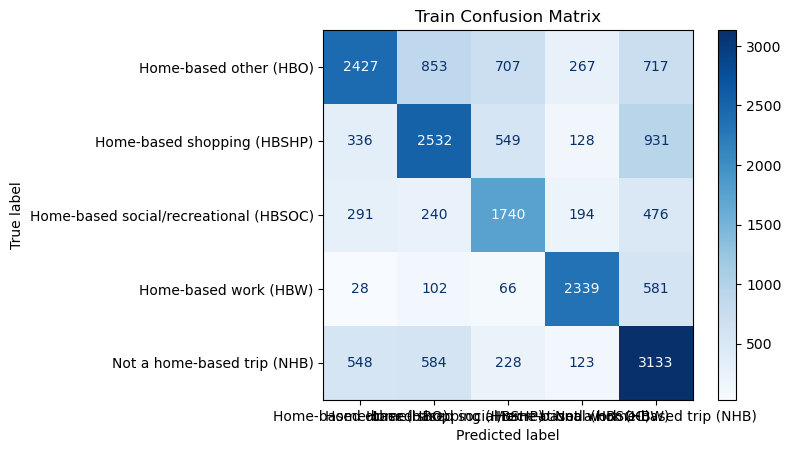

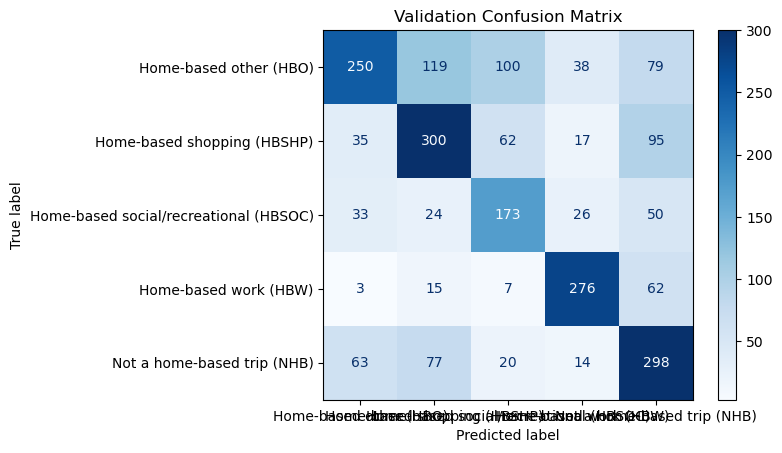

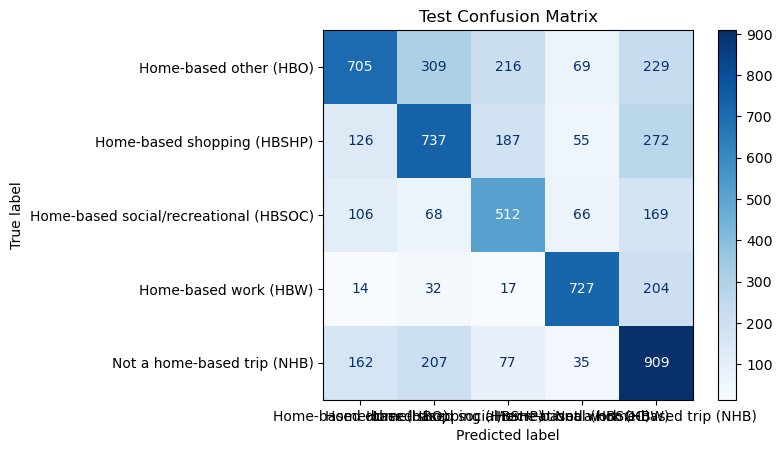

In [109]:
# Evaluate model
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Train Accuracy: {model.evaluate(x_train, y_train, verbose=0)[1]:.4f}")
print(f"Validation Accuracy: {model.evaluate(x_val, y_val, verbose=0)[1]:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Train confusion matrix
predictions = model.predict(x_train, verbose=0)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_train, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Train Confusion Matrix")
plt.show()

# Validation confusion matrix
predictions = model.predict(x_val, verbose=0)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_val, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Validation Confusion Matrix")
plt.show()

# Test confusion matrix
predictions = model.predict(x_test, verbose=0)
predictions = np.argmax(predictions, axis=1)
cm = confusion_matrix(y_test, predictions)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap='Blues')
plt.title("Test Confusion Matrix")
plt.show()

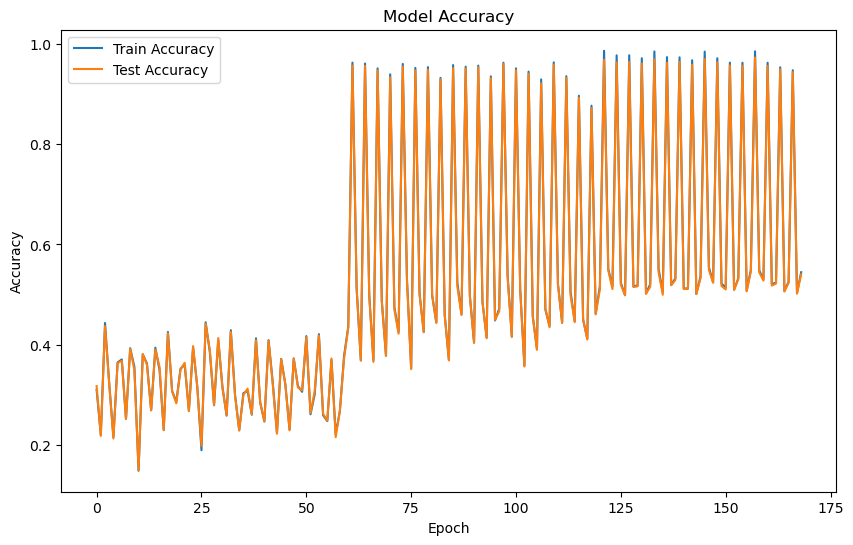

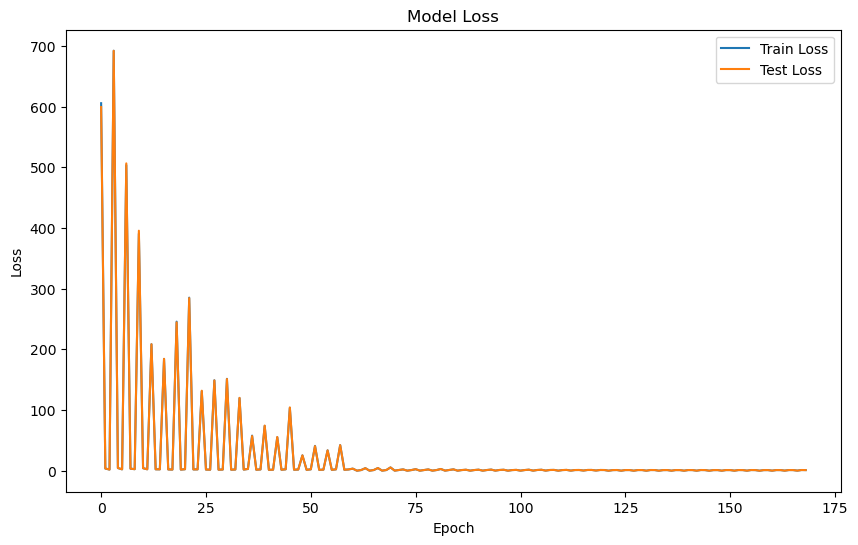

In [ ]:
# Generate training curves

history

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()